## Information of the dataset
The dataset contains 768 individuals data with 9 features set. The detailed description of all the features are as follows:

- Pregnancies: indicates the number of pregnancies
- Glucose: indicates the plasma glucose concentration
- Blood Pressure: indicates diastolic blood pressure in mm/Hg
- Skin Thickness: indicates triceps skinfold thickness in mm
- Insulin: indicates insulin in U/mL
- BMI: indicates the body mass index in kg/m2
- Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history
- Age: indicates the age of the person
- Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no)

In [1]:
import sys
sys.path.append("../src/")
import my_functions

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
colnames = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv("../data/raw/pima.csv", names = colnames)

# Rename outcome columns
df['Outcome'] = df['Outcome'].astype('category')
df['Outcome'] = df['Outcome'].cat.rename_categories({0:"healthy", 1:"diabetes"})

## 1.Exploratory Data Analysis

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
df.isnull().values.any()

False

### 1.1 Target Distribution

Text(0.5, 1.0, 'Data Distribution')

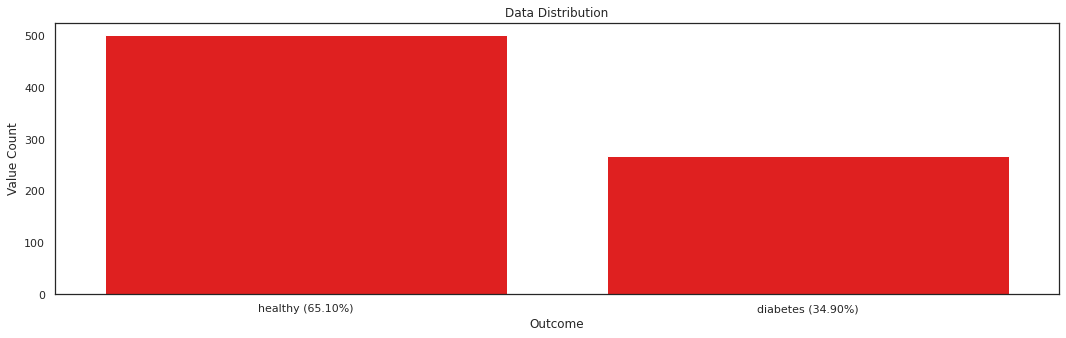

In [5]:
plt.rcParams['figure.figsize'] = [18, 5]

# Obtain Percentages
healthy = df['Outcome'].value_counts()[0] / df.shape[0] * 100
diabetes = df['Outcome'].value_counts()[1] / df.shape[0] * 100


# Plot Training
sns.countplot(df['Outcome'], color="red")
plt.xticks((0, 1), ['healthy ({0:.2f}%)'.format(healthy), 'diabetes ({0:.2f}%)'.format(diabetes)])
plt.ylabel('Value Count')
plt.title("Data Distribution")

#### Findings target distribution

<ul>
<li>The data is imbalance that is why we can not rely on accuracy as an optimizing metric. </li>
<li>However, it is not heavily imbalance </li>
</ul>

### 1.2 Pairplot

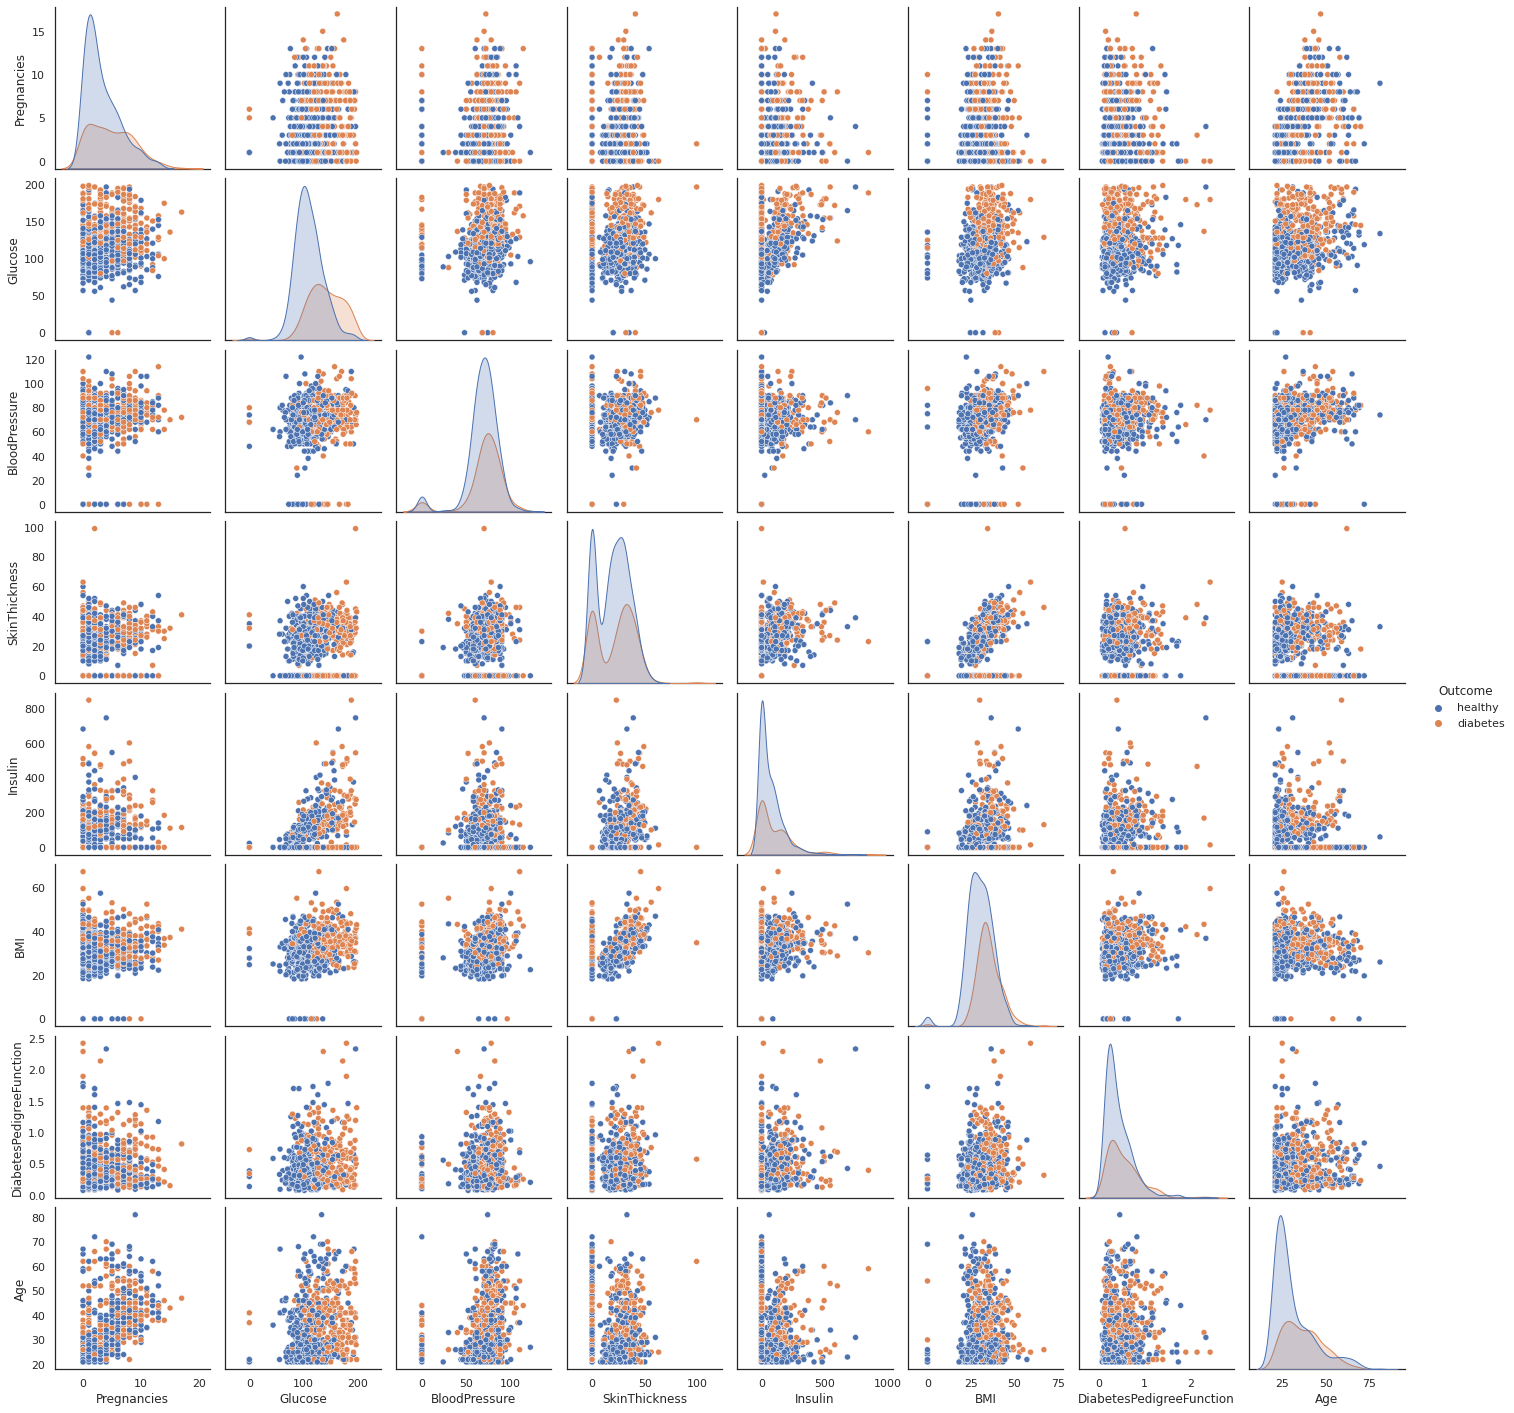

In [6]:
sns.pairplot(df, hue="Outcome") 

#### Findings  pair plots

- Hay algunos datos en el dataset que no hacen sentido, como que haya un BMI, Glucose, Insulin, SkinThickness de 0.
- Si tienen 0 de insulina tienen diabetes.
- Glucosa 0 



### 1.3 Correlations

Text(0.5, 1.0, 'Correlation Plot Between Variables')

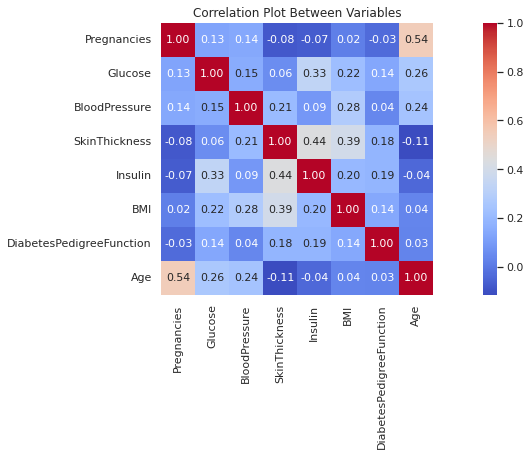

In [7]:
# Whole Data
sns.heatmap(df.iloc[:, 0:8].corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 11}, fmt='.2f')
plt.title("Correlation Plot Between Variables")

#### Findings correlation plot
1. There are not significant correlation between the variables

### 1.4 Missing Data

Text(0.5, 1.0, 'NA Values')

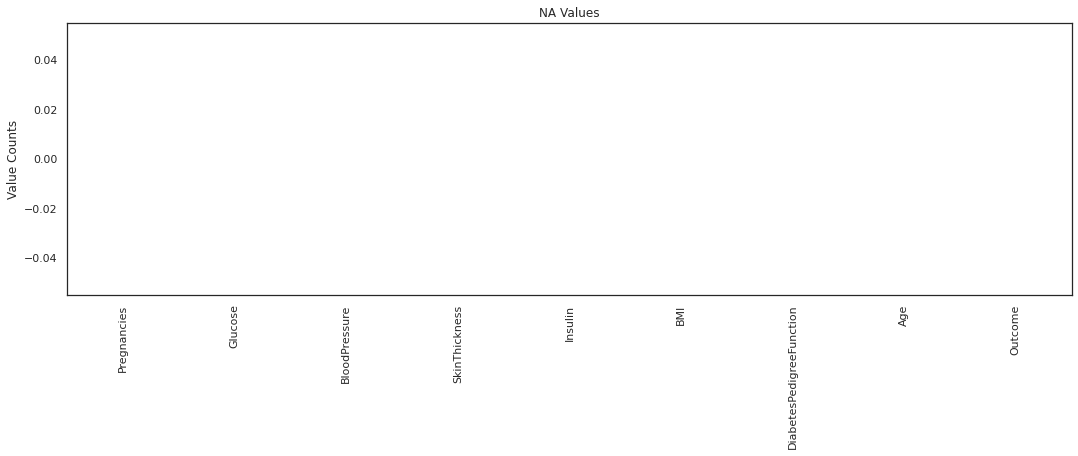

In [8]:
df.isna().sum().plot.bar()
plt.ylabel("Value Counts")
plt.title("NA Values")

#### Findings NA values

Check the values that make no sense 

### 1.5 Categorical Data

In [9]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

Text(0.5, 1.0, 'Age')

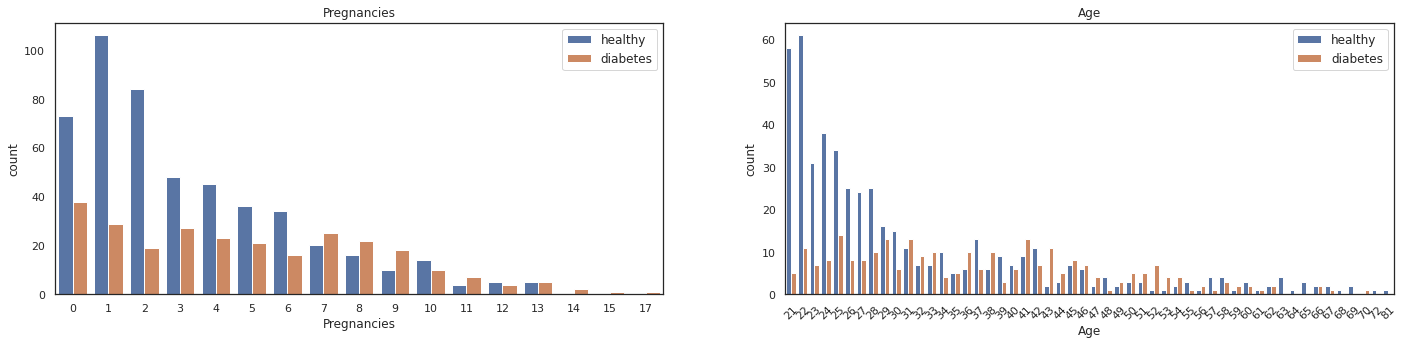

In [10]:
#Categorical Data
plt.rcParams['figure.figsize'] = [24, 5]

# Pregnancies
plt.subplot(1, 2, 1)
sns.countplot(x='Pregnancies', data=df, hue="Outcome")
plt.legend( loc='upper right', prop={'size': 12})
plt.title("Pregnancies")

# Age
plt.subplot(1, 2, 2)
sns.countplot(x='Age', data=df, hue="Outcome")
plt.legend( loc='upper right', prop={'size': 12})
plt.xticks(rotation = 45) 
plt.title("Age")


<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

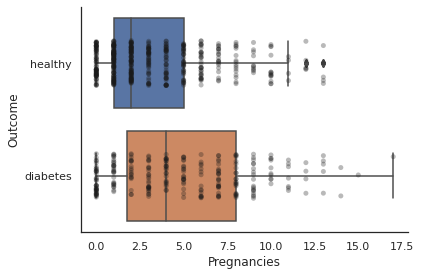

In [11]:
# make boxplot with Catplot
sns.catplot(x='Pregnancies', 
            y='Outcome',
            kind="box",
            data=df,
            height=4,
            aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Pregnancies', 
              y='Outcome',
              data=df,
              alpha=0.3,
              jitter=0.2,
              color='k')

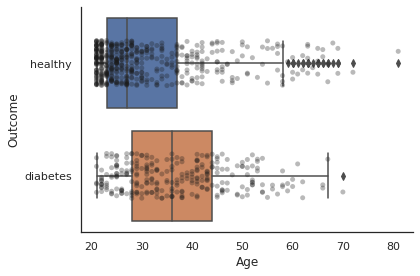

In [12]:
# make boxplot with Catplot
sns.catplot(x='Age', 
            y='Outcome',
            kind="box",
            data=df,
            height=4,
            aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Age', 
              y='Outcome',
              data=df,
              alpha=0.3,
              jitter=0.2,
              color='k');

#### Findings Categorical Data

1. The majority of healthy people is less than 30 years old.
2. The class imbalance changes with the number of pregnancies

### 1.6 Continuos Data

#### 1.6.1 Density Plots

In [13]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetes
1,1,85,66,29,0,26.6,0.351,31,healthy


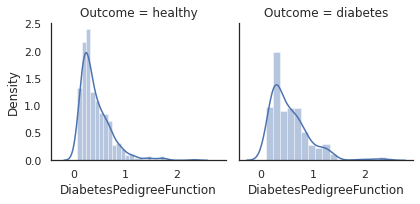

In [14]:
# DiabetesPedigreeFunction
g = sns.FacetGrid(df, col='Outcome')
g = g.map(sns.distplot, 'DiabetesPedigreeFunction')

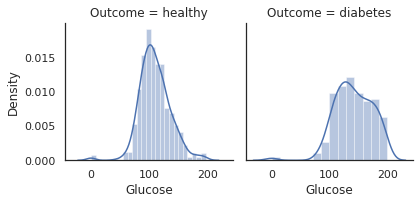

In [15]:
# Glucose
g = sns.FacetGrid(df, col='Outcome')
g = g.map(sns.distplot, "Glucose")

#### 1.6.1 Outliers

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

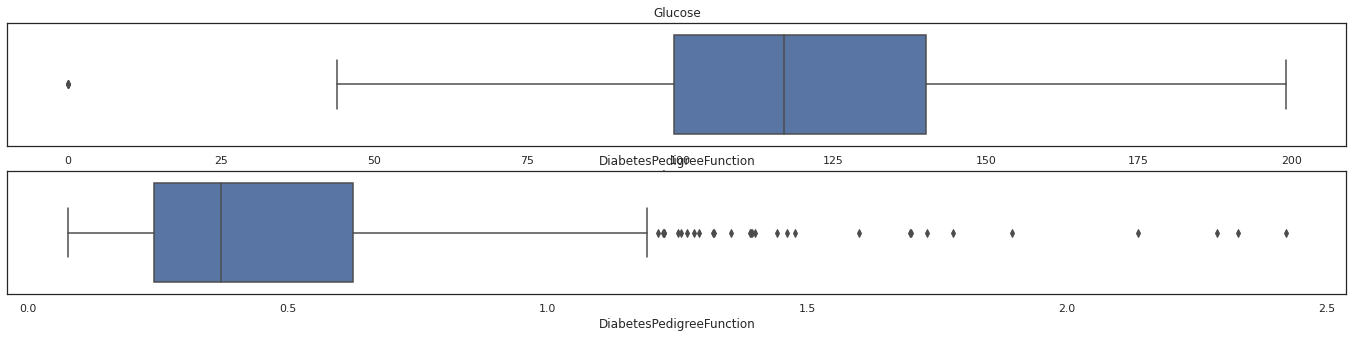

In [16]:
# Glucose
plt.subplot(2,1,1)
sns.boxplot(df["Glucose"])
plt.title("Glucose")

# DiabetesPedigreeFunction
plt.subplot(2,1,2)
sns.boxplot(df["DiabetesPedigreeFunction"])
plt.title("DiabetesPedigreeFunction")

#### Findings Continuos  Data

1. There are some outliers in DiabetesPedigreeFunction

## 2. Preprocesamiento

### 2.1 Quitar valores sin sentido

In [17]:
columns_NA = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]
df[columns_NA] = df[columns_NA].replace(0, np.nan)

<Figure size 1728x360 with 0 Axes>

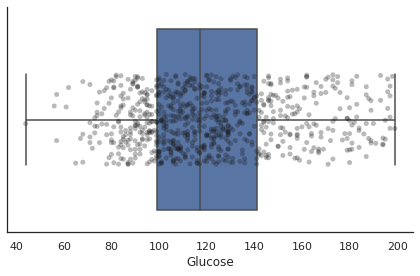

<Figure size 1728x360 with 0 Axes>

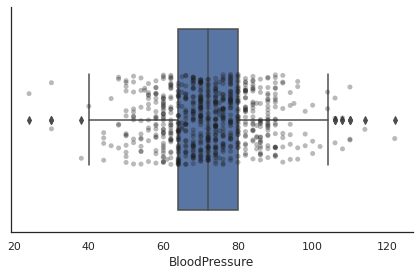

<Figure size 1728x360 with 0 Axes>

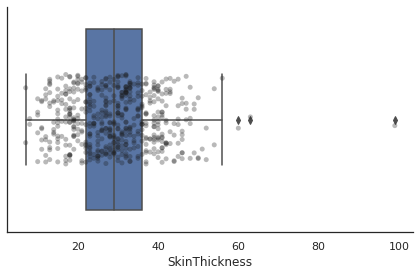

<Figure size 1728x360 with 0 Axes>

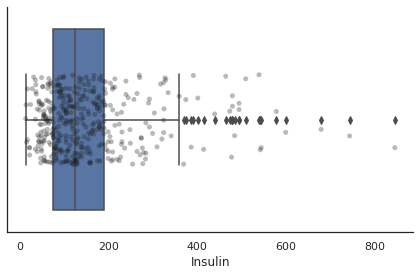

<Figure size 1728x360 with 0 Axes>

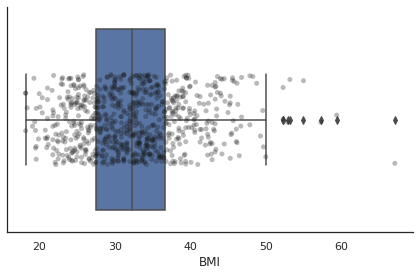

<Figure size 1728x360 with 0 Axes>

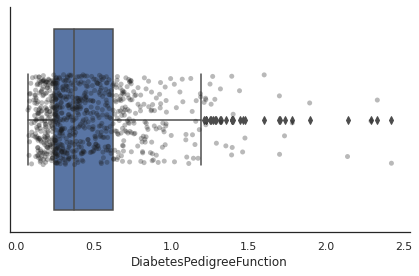

In [18]:
for column in df[columns_NA]:
    plt.figure()
    # make boxplot with Catplot
    sns.catplot(x= column, 
                kind="box",
                data=df,
                height=4,
                aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=column, 
                data=df,
                alpha=0.3,
                jitter=0.2,
                color='k')

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [20]:
df.isnull().values.any()

True

Text(0.5, 1.0, 'NA Values')

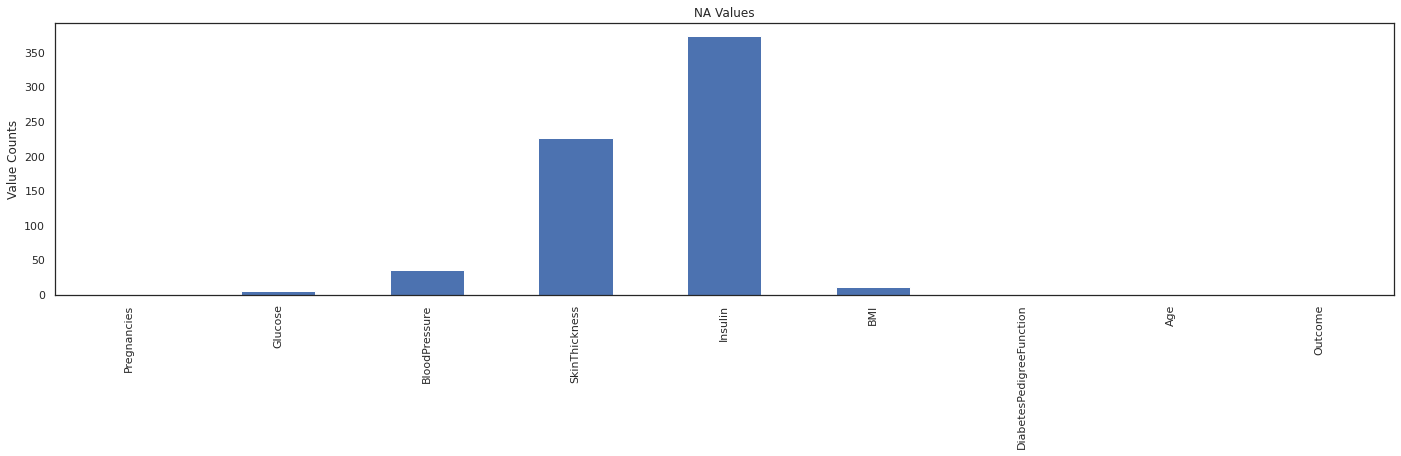

In [21]:
df.isna().sum().plot.bar()
plt.ylabel("Value Counts")
plt.title("NA Values")

### 2.2 Educated Guess NA values

The NA values will be filled with the median

In [22]:
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

Text(0.5, 1.0, 'NA Values')

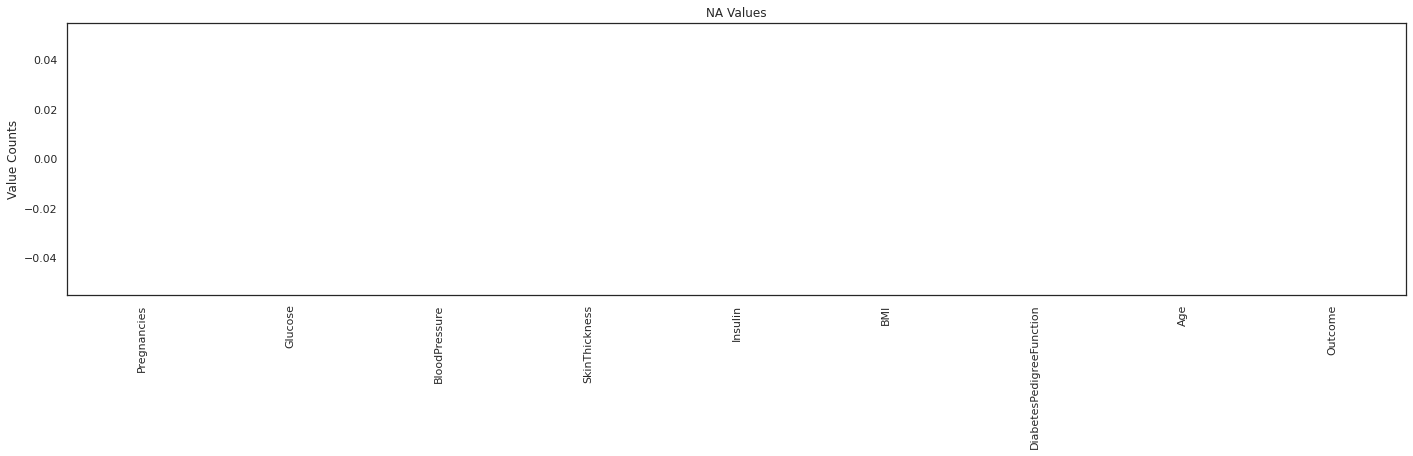

In [23]:
df.isna().sum().plot.bar()
plt.ylabel("Value Counts")
plt.title("NA Values")

### 2.3 Standard Scaler

In [24]:
# Initiate Standard Scalaer
scaler = StandardScaler()

# Separate target and variables
X = df.iloc[:, 0:8]

# Scale variables
X_scaled = scaler.fit_transform(X)

In [25]:
varnames = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X_scaled = pd.DataFrame(X_scaled, columns = varnames)

# Append target to variable
df_scaled = X_scaled.join(df["Outcome"])

# Write csv of scaled variables
df_scaled.to_csv("../data/preprocess/pima_standard_scaler.csv", index=False)

In [26]:
df_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-1.123956e-17,-1.795800e-16,4.416317e-17,2.815312e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [27]:
df_scaled.isnull().values.any()

False

## 3. Conclusions